# The Prosper Loan Data Project
## by Abimbola Akinjobi

## Investigation Overview


> This project looked at the prosper Loan dataset by investigating the relationship between borrower's interest rate with other variables and also look at employment and loan status metric.
> Key insights included:
>1. Average BorrowerRate is 0.2
>2. Average Loan amount is $8337.01
>3. Employed individuals have the highest loans especially current employed individuals are more likely to apply for and receive loans.
>4. Current loans are the highest of all loan status
>5. As the loan amount and credit rating increases, the Borrower rate reduces

> Overall, the borrower's rate were greatly impacted by ratings and loan amount with employed individuals having the highest amount of loan.

## Dataset Overview

> The prosper Loan dataset was used for this project. The dataset had details about loans disbursed including loan amount, borrower rate (or interest rate), current loan status, employment status e.t.c. The prosper loan dataset has 113,937 rows of data and 81 columns. Some modifications were made to the dataset using the variabale definition as a guide. The dataset was modified further by selecting columns that was needed for the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
loan_df = pd.read_csv('loan_df.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
def labels (a, b, c):
    """
    Args:
    a (str): x-axis title(weight = "bold")
    b (str): y-axis title(weight = 'bold')
    c (str): main title(weight = 'bold')
    
    
    Returns:
    None
    """
    
    plt.xlabel(a, weight = 'bold')
    plt.ylabel(b, weight = 'bold')
    plt.title(c, fontsize = 14, weight = 'bold')
    plt.show()

In [4]:
type_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
loan_order = ['Current', 'Completed', 'FinalPaymentProgress', 'PastDue(1-15 days)', 'PastDue(16-30 days)','PastDue(31-60 days)', 
             'PastDue(61-90 days)', 'PastDue(90-120 days)', 'PastDue(>120 days)', 'Chargedoff', 'Defaulted', 'Cancelled']

## (Visualization 1)

> What is the distribution of employment status?
> Employed individuals have the highest frequency of employment status.

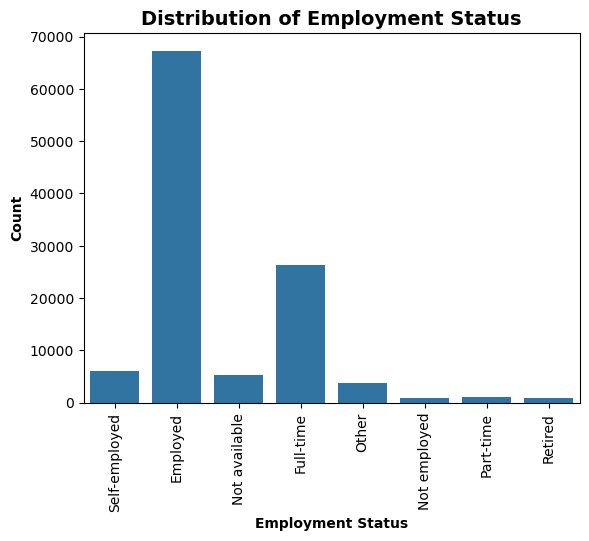

In [6]:
base_color = sns.color_palette()[0]
sns.countplot(data = loan_df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);
labels('Employment Status', 'Count', 'Distribution of Employment Status')

## (Visualization 2)

> There are more active loans than any other type of loans followed by completed loans

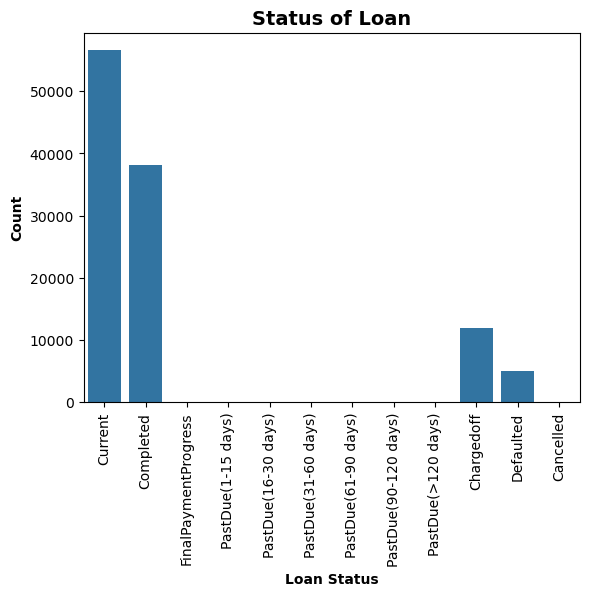

In [7]:
sns.countplot(data=loan_df, x='LoanStatus', color=base_color, order=loan_order);
plt.xticks(rotation=90);
labels('Loan Status', 'Count', 'Status of Loan')

## (Visualization 3)

>Prosper rating C had the highest frequency followed by B

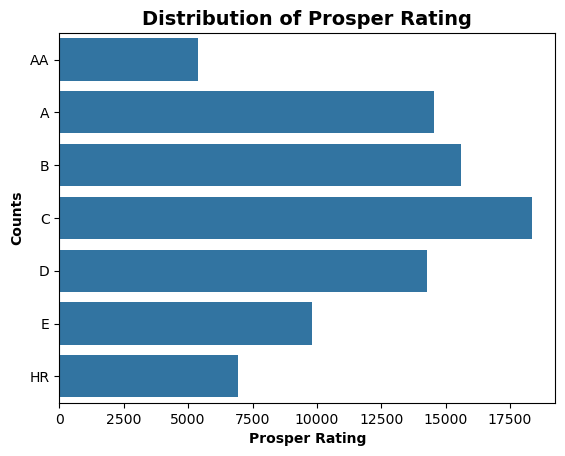

In [8]:
sns.countplot(data=loan_df, y='ProsperRating', color=base_color, order=type_order);
labels('Prosper Rating', 'Counts', 'Distribution of Prosper Rating')

## (Visualization 4)

> The average loan is $8337.01. Although majority of loans are above average, there are substantial amount below the average.

Mean loan amount:  $8337.01


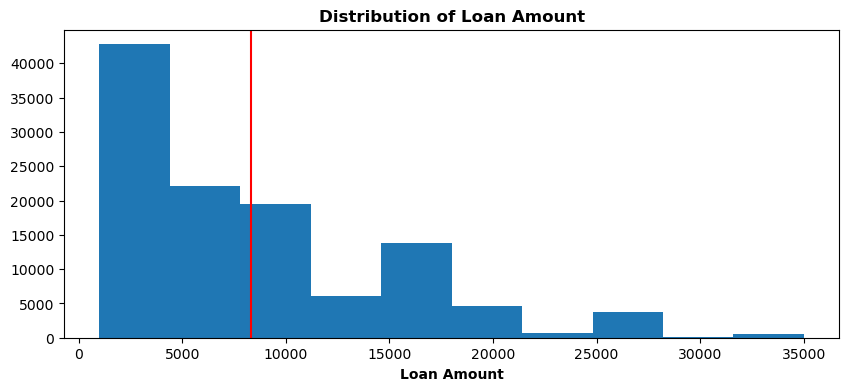

In [9]:
loan_mean = loan_df.LoanOriginalAmount.mean()
print('Mean loan amount:  ${:0.2f}'.format(loan_mean))
plt.figure(figsize=[10, 4])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', color = base_color)
plt.xlabel('Loan Amount', weight= 'bold');
plt.axvline(x=loan_mean, color='r');
plt.title('Distribution of Loan Amount', weight = 'bold');

## (Visualization 5)

> The average interest rate is 0.2, however the interest rate are almost evenly distributed.

Average interest rate:  0.2


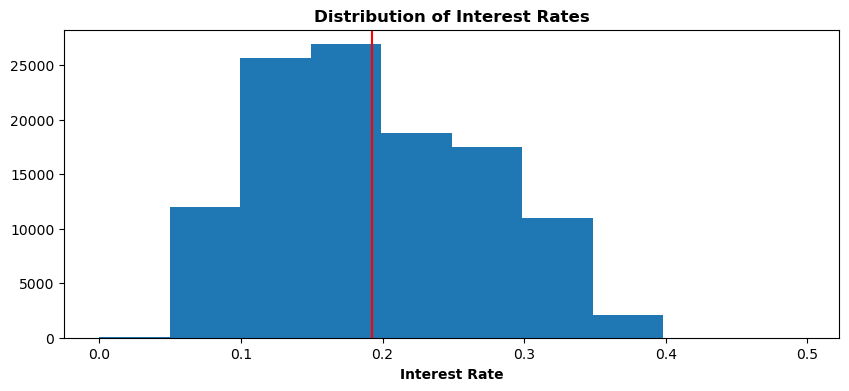

In [12]:
rate_mean = loan_df.BorrowerRate.mean()
print('Average interest rate:  {:0.1f}'.format(rate_mean))
base_color = sns.color_palette()[0]
plt.figure(figsize=[10, 4])
plt.hist(data = loan_df, x = 'BorrowerRate', color = base_color)
plt.xlabel('Interest Rate', weight = 'bold');
plt.axvline(x=rate_mean, color='r');
plt.title('Distribution of Interest Rates', weight= 'bold');

## (Visualization 6)

> This Borrower's Interest Rate is negatively correlated with loan amount. As the loan amount increases, the Borrower rate reduces which could be a strategy to get more loans disbursed.

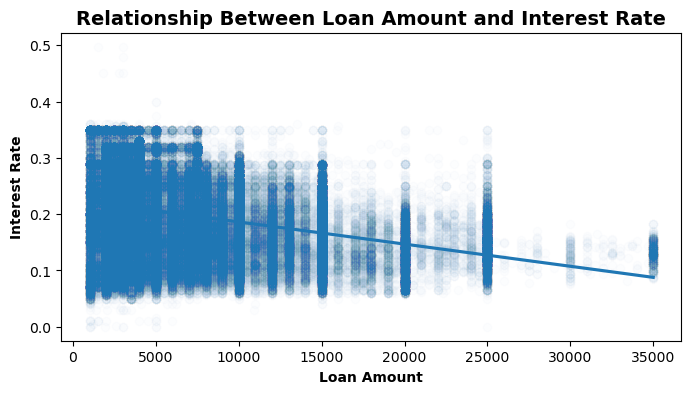

In [13]:
plt.figure(figsize = [8, 4])
sns.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
labels('Loan Amount', 'Interest Rate', 'Relationship Between Loan Amount and Interest Rate')

## (Visualization 7)

> As the credit increases, the Borrower's interest rate reduces. This means higher credit rating means borrower is less likely to default

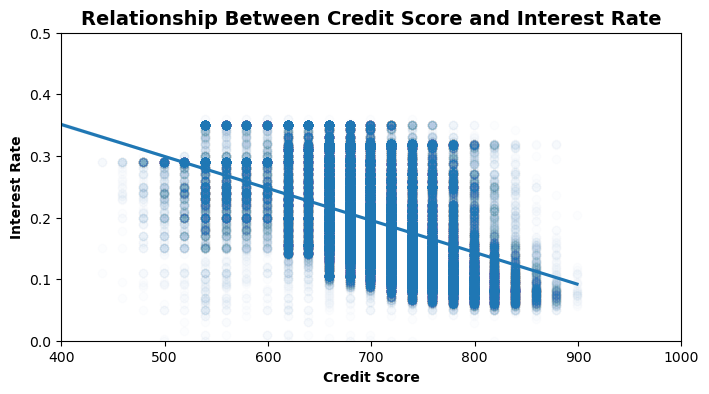

In [14]:
plt.figure(figsize = [8, 4])
sns.regplot(data = loan_df, x = 'CreditScoreRangeUpper', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
plt.xlim(400, 1000);
plt.ylim(0, .5);
labels('Credit Score', 'Interest Rate', 'Relationship Between Credit Score and Interest Rate')

## (Visualization 8)

> As the borrower's credit score increases, the interest rate decreases which further solidifies our findings.

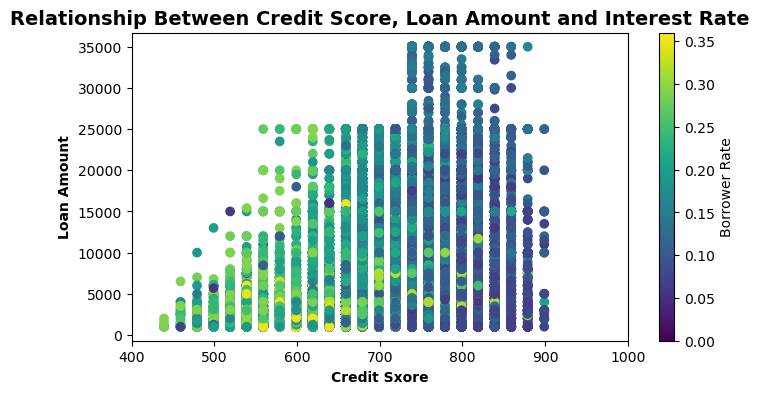

In [18]:
plt.figure(figsize=[8,4])
plt.scatter(data= loan_df, x='CreditScoreRangeUpper', y='LoanOriginalAmount', c='BorrowerRate');
plt.colorbar(label='Borrower Rate');
plt.xlim(400, 1000);
labels('Credit Sxore', 'Loan Amount', 'Relationship Between Credit Score, Loan Amount and Interest Rate')

## Conclusion

>Overall, employed individuals have the highest current loan and the borrower's rate are influenced by credit score and loan amount.

## The End

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_The_Prosper_Loan_Data_Project.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 